In [ ]:
import numpy as np
from pylab import plt
import tensorflow as tf


In [ ]:
import tensorflow.keras as keras

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Input, Flatten,\
                                    Reshape, LeakyReLU as LR,\
                                    Activation, Dropout
from tensorflow.keras.models import Model, Sequential

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)  
x_test = tf.keras.utils.normalize(x_test, axis=1) 

In [ ]:
LATENT_SIZE = 32

In [ ]:
len(x_train)

60000

**The Encoder**

In [ ]:
encoder = Sequential([
    Flatten(input_shape = (28, 28)),
    Dense(256, activation='sigmoid'),
    LR(),
    Dropout(0.5),
    Dense(330, activation='sigmoid'),
    LR(),
    Dropout(0.5),
    Dense(128, activation='sigmoid'),
    LR(),
    Dropout(0.5),
    Dense(64, activation='sigmoid'),
    LR(),
    Dropout(0.5),
    LR(),
    Dropout(0.5),
    Dense(LATENT_SIZE)
  ])

**The Decoder**

In [ ]:
decoder = Sequential([
    Dense(64, input_shape = (LATENT_SIZE,)),
    LR(),
    Dropout(0.5),
    Dense(128, activation='sigmoid'),
    LR(),
    Dropout(0.5),
    Dense(330, activation='sigmoid'),
    LR(),
    Dropout(0.5),
    Dense(512 ,activation='sigmoid'),
    LR(),
    Dropout(0.5),
    Dense(784),
    Activation('sigmoid'),
    Reshape((28, 28))
])

# **The Model**

In [ ]:
img = Input(shape = (28, 28))

In [ ]:
latent_vector = encoder(img)
output = decoder(latent_vector)

In [ ]:
loss_fn = tf.keras.losses.MeanSquaredError()

In [ ]:
model = Model(inputs = img, outputs = output)
model.compile("nadam", loss ="binary_crossentropy", metrics=["binary_accuracy"])

In [ ]:
#model.summary()

**Training the Model**

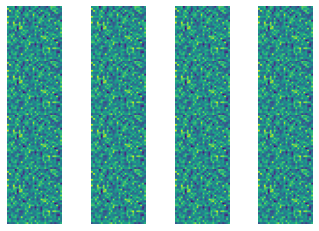

----------- EPOCH 0 -----------
1875/1875 [==============================] - 36s 18ms/step - loss: 0.1724 - binary_accuracy: 0.8082


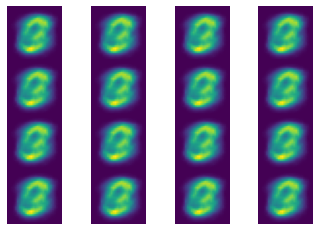

----------- EPOCH 1 -----------
1875/1875 [==============================] - 35s 19ms/step - loss: 0.1689 - binary_accuracy: 0.8088


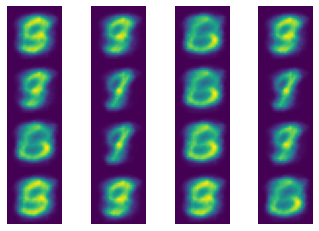

----------- EPOCH 2 -----------
1875/1875 [==============================] - 37s 20ms/step - loss: 0.1606 - binary_accuracy: 0.8088


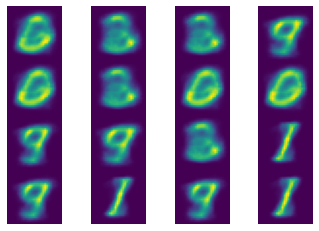

----------- EPOCH 3 -----------
1875/1875 [==============================] - 37s 20ms/step - loss: 0.1573 - binary_accuracy: 0.8088


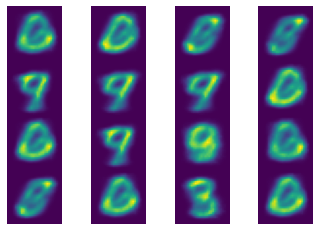

----------- EPOCH 4 -----------
1875/1875 [==============================] - 37s 20ms/step - loss: 0.1545 - binary_accuracy: 0.8088


In [ ]:
EPOCHS = 5 #tried 50 epochs and the accuracy got to 0.14

for epoch in range(EPOCHS):
    fig, axs = plt.subplots(4, 4)
    rand = x_test[np.random.randint(0, 10000, 16)].reshape((4, 4, 1, 28, 28))
    
    for i in range(4):
        for j in range(4):
            axs[i, j].imshow(model.predict(rand[i, j])[0])
            #, cmap = "gray"
            axs[i, j].axis("off")
    
    plt.subplots_adjust(wspace = 0, hspace = 0)
    plt.show()
    print("-----------", "EPOCH", epoch, "-----------")

    model.fit(x_train, x_train)

we can compare the out put of the model with the real data

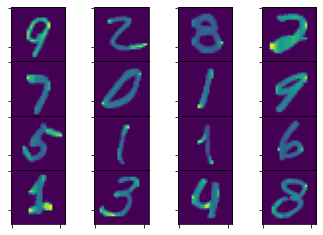

In [ ]:
fig, ax= plt.subplots (4, 4)
for k in range (4):
    for l in range (4):
        rnd= np.random.randint (len(x_train))
        ax[k, l].imshow (x_train[rnd])
        plt.subplots_adjust(wspace = 0, hspace = 0)
        ax[k, l].set_xticklabels([])
        ax[k, l].set_yticklabels([])